In [2]:
import Ofpp
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [3]:
RANS_folder = '/home/ryley/WDK/ML/dataset/foam/komegasst/flatplate/'
nu = 1.388e-05
U_infty = 69.4*0.99

In [6]:
U = Ofpp.parse_internal_field(os.path.join(RANS_folder,'39600','U'))[:,0:1].flatten()
k = Ofpp.parse_internal_field(os.path.join(RANS_folder,'39600','k'))

C = Ofpp.parse_internal_field(os.path.join(RANS_folder,'39600','C'))[:,0:2]
C_bottom = Ofpp.parse_boundary_field(os.path.join(RANS_folder,'39600','C'))[b'bottomWall'][b'value'][:,0]
wss = Ofpp.parse_boundary_field(os.path.join(RANS_folder,'39600','wallShearStress'))[b'bottomWall'][b'value'][:,0]
print(max(C[:,1]))

0.98610811


10000


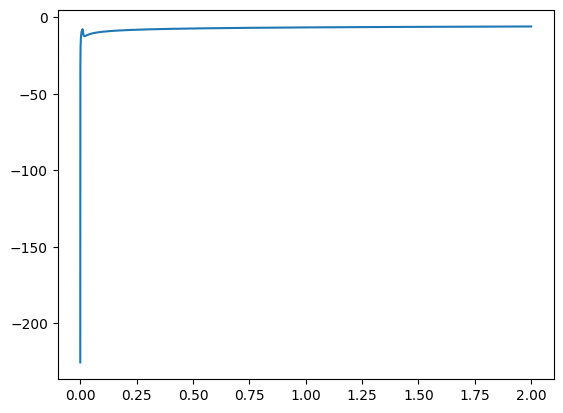

In [7]:
plt.plot(C_bottom,wss)
print(len(wss))

In [8]:
def v_line(wall_index):
    ind = np.where(abs(C[:,0] - C_bottom[wall_index])<1E-5)
    return U[ind],C[:,1][ind], ind


(4673130,)


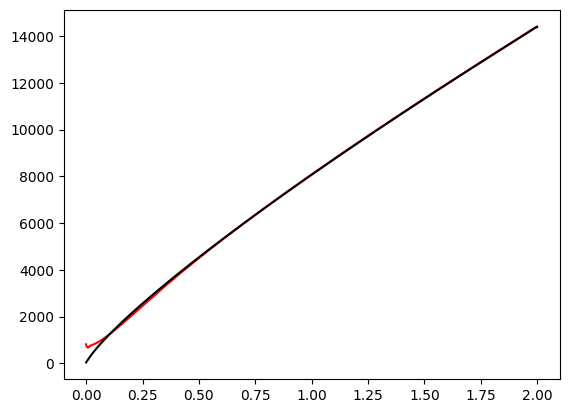

In [9]:
U_plus = np.empty(U.shape)
k_plus = np.empty(C[:,1].shape)
y_plus = np.empty(C[:,1].shape)
theta = np.empty(wss.shape)
Re_theta = np.empty(wss.shape)
Re_tau = np.empty(wss.shape)
utau = np.sqrt(np.abs(wss))


for i_wall, x_wall in enumerate(C_bottom):
    utau_i = utau[i_wall]
    v_U, v_y, v_ind = v_line(i_wall)
    U_plus[v_ind] = np.divide(v_U,utau_i)
    y_plus[v_ind] = np.divide(utau_i*v_y,nu)
    k_plus[v_ind] = np.divide(k[v_ind],np.square(utau_i))
    i = np.where(v_U < 69.4)
    U_interp = v_U[i]
    y_interp = v_y[i]
    #theta[i_wall] = scipy.interpolate.griddata(U_interp, y_interp, [0.99*U_infty], method='cubic')
    U_inf_i = np.mean(v_U[-65:])
    v_U_Uinf = v_U/U_inf_i
    #print((v_U_Uinf[0:-1]*(1-v_U_Uinf[0:-1])+v_U_Uinf[1:]*(1-v_U_Uinf[1:]))/2)
    theta[i_wall] = np.sum((v_y[1:]-v_y[0:-1])*(v_U_Uinf[0:-1]*(1-v_U_Uinf[0:-1])+v_U_Uinf[1:]*(1-v_U_Uinf[1:]))/2)
    Re_theta[i_wall] = np.divide(U_inf_i*theta[i_wall],nu)
    #print(ind)
print(y_plus.shape)
Re_theta_nasa = np.genfromtxt('/home/ryley/WDK/ML/dataset/kth_flatplate/nasa_retheta_variation_typical.dat',skip_header=3)
plt.plot(C_bottom,Re_theta,'r')
plt.plot(Re_theta_nasa[:,0],Re_theta_nasa[:,1],'k')

#plt.ylim([0,10000])

In [10]:
dns_data = np.genfromtxt('/home/ryley/WDK/ML/dataset/kth_flatplate/vel_4060_dns.prof',skip_header=14)
print(dns_data[0:3,:])
print(len(dns_data))

[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00 -0.0000000e+00  2.8678169e+00
   0.0000000e+00 -0.0000000e+00 -1.5951010e-01  5.2106039e+00
   1.0000000e+00  0.0000000e+00  2.9252360e-01  0.0000000e+00
   4.2609300e-01]
 [ 2.5700000e-05  3.2649500e-02  3.2649500e-02  1.3905900e-02
   1.4200000e-05  9.5131000e-03 -0.0000000e+00  2.8675184e+00
   4.6742000e-03 -1.4000000e-05  1.0704774e+00  5.2106039e+00
   9.9999920e-01  0.0000000e+00  2.9021290e-01  1.0099000e-03
   4.2573720e-01]
 [ 1.0270000e-04  1.3059670e-01  1.3059650e-01  5.5553200e-02
   2.2380000e-04  3.7595400e-02 -2.4000000e-06  2.8666681e+00
   1.8668100e-02 -2.1850000e-04  1.0773718e+00  5.2156771e+00
   9.9999500e-01  0.0000000e+00  2.8325060e-01  4.0399000e-03
   4.2471310e-01]]
513


7.291118556459266e-304
6105
0.05414241315471824


/tmp/ipykernel_10375/3907183948.py:9: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0,5E3])


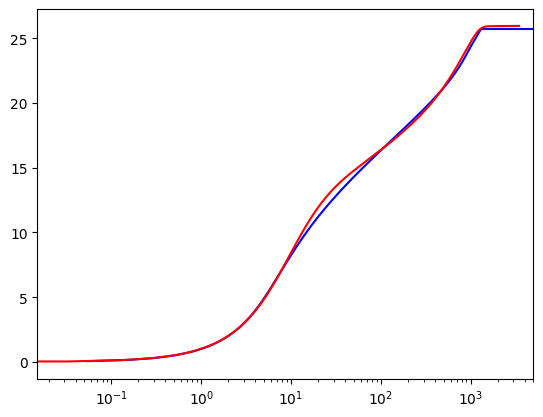

In [11]:
Re_theta_match = 4061.378
ind_wall = np.nanargmin(np.abs(Re_theta-Re_theta_match))
ind = v_line(ind_wall)[2]
print(Re_tau[ind_wall])
print(np.nanargmin(np.abs(Re_theta-Re_theta_match)))
plt.plot(y_plus[ind],U_plus[ind],'b')
plt.plot(dns_data[:,1],dns_data[:,2],c='r')
plt.semilogx()
plt.xlim([0,5E3])

print(y_plus[ind][0])

7.291118556459266e-304
6105


/tmp/ipykernel_10375/960931161.py:9: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0,5E3])


(0.014975689568097226, 5000.0)

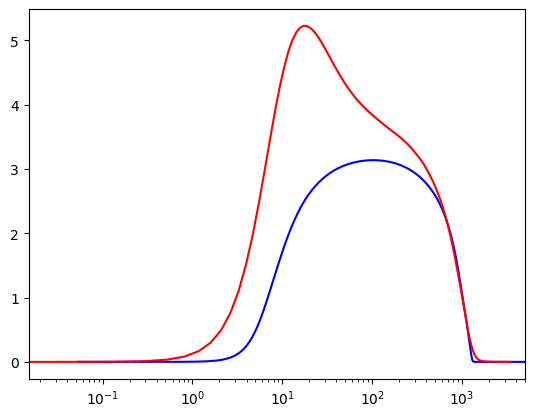

In [12]:
Re_theta_match = 4061.378
ind_wall = np.nanargmin(np.abs(Re_theta-Re_theta_match))
ind = v_line(ind_wall)[2]
print(Re_tau[ind_wall])
print(np.nanargmin(np.abs(Re_theta-Re_theta_match)))
plt.plot(y_plus[ind],k_plus[ind],'b')
plt.plot(dns_data[:,1],0.5*(np.square(dns_data[:,3])+np.square(dns_data[:,4])+np.square(dns_data[:,5])),c='r')
plt.semilogx()
plt.xlim([0,5E3])

7.291118556459266e-304
6105


/tmp/ipykernel_10375/2022507995.py:9: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0,5E3])


(0.014975689568097226, 5000.0)

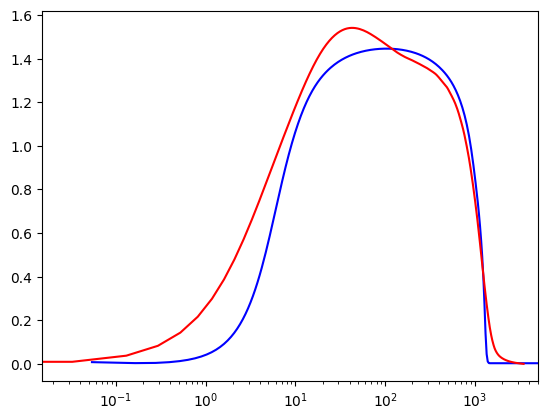

In [13]:
Re_theta_match = 4061.378
ind_wall = np.nanargmin(np.abs(Re_theta-Re_theta_match))
ind = v_line(ind_wall)[2]
print(Re_tau[ind_wall])
print(np.nanargmin(np.abs(Re_theta-Re_theta_match)))
plt.plot(y_plus[ind],np.sqrt(0.6666*k_plus[ind]),'b')
plt.plot(dns_data[:,1],dns_data[:,5],c='r')
plt.semilogx()
plt.xlim([0,5E3])